# 1. 데이터셋 불러오기

In [1]:
import os
import pandas as pd

# bike-sharing-demand 폴더의 train.csv 불러오기
train_path = os.getenv('HOME') + ('/data/data/bike-sharing-demand/train.csv')
train = pd.read_csv(train_path)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**피쳐 설명**

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [2]:
train['datetime'] = pd.to_datetime(train['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [3]:
# year, month, day, hour, minute, second 컬럼 생성
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['minute'] = train.datetime.dt.minute
train['second'] = train.datetime.dt.second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


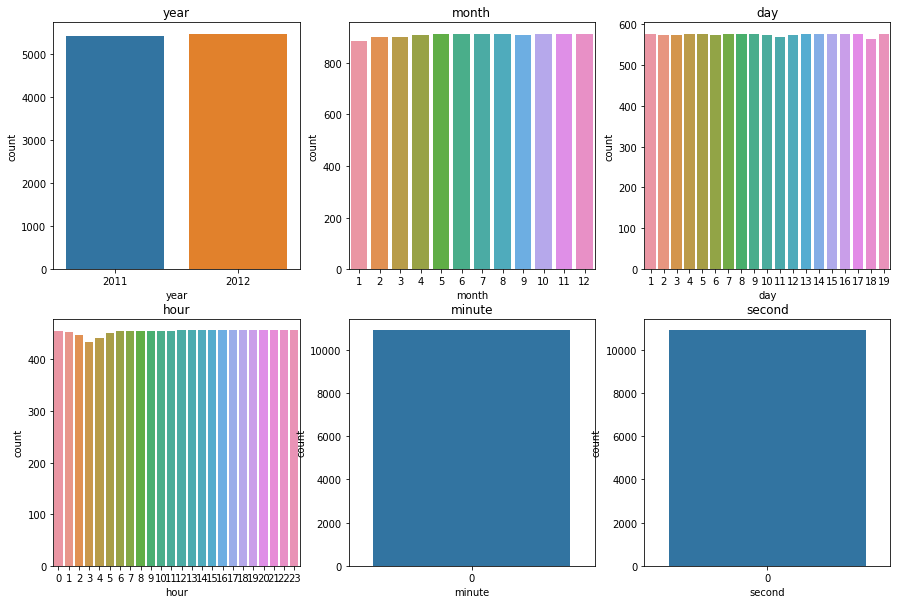

In [4]:
# datetime 관련 컬럼 시각화하기
%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns

datetime_cols = ['year', 'month', 'day', 'hour', 'minute', 'second']

fig, ax = plt.subplots(2, 3, figsize = (15, 10))
count = 0

for row in range(2):
    for col in range(3):
        sns.countplot(data = train, x = datetime_cols[count], ax = ax[row][col])
        ax[row][col].set_title(datetime_cols[count])
        count +=1 

plt.show()

# 2. Feature Engineering

In [5]:
# minute, second는 모두 0값이므로 삭제한다.
# datetime 또한 year, month, day... 컬럼이 별도로 존재하기에 삭제

del_col = ['minute', 'second', 'datetime']
train.drop(del_col, axis = 1, inplace = True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


In [6]:
# X, y로 feature & target 데이터 나누기
X = train.drop('count', axis = 1)
y = train['count'] 

In [7]:
# 데이터 관계 파악을 위해 X, y 합쳐서 분석하기
df = pd.concat([X, y], axis = 1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4,1


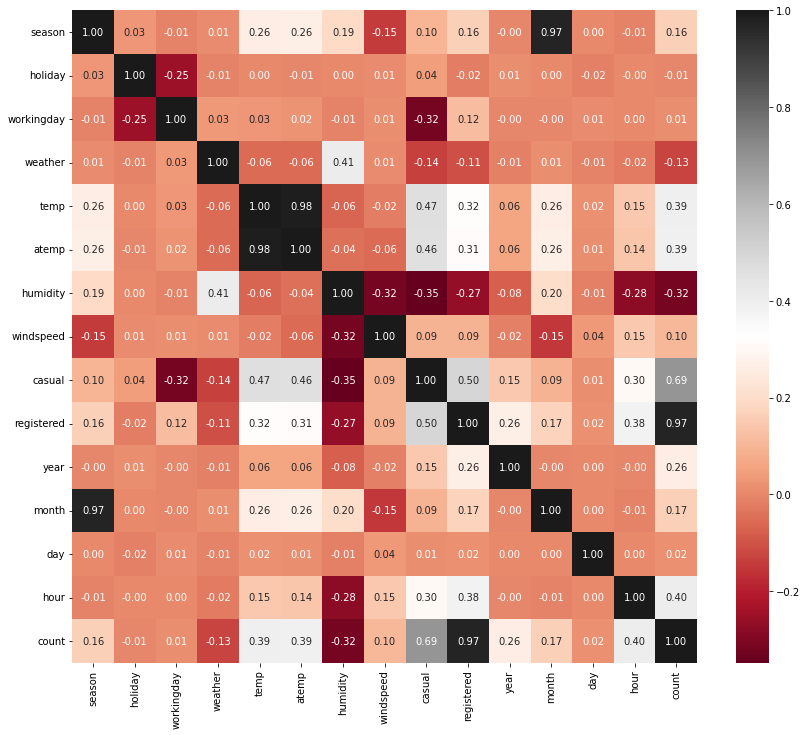

In [8]:
# 상관계수 분석하기
plt.figure(figsize = (14, 12))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'RdGy')
plt.show()

- registered와 casual의 합으로 count가 계산되는 것이므로 상관계수가 높게 나타남 -> 해당 feature 삭제 필요 
- season은 month을 기반으로 구분되는 값이므로 중복값으로 고려됨. (상관계수 = 0.97) -> month 삭제
- holiday, workingday, day와 count의 상관계수는 각 -0.01, 0.01, 0.02 로 매우 낮은 수준으로 베이스 모델과 튜닝 모델 비교가 필요할 듯 함
- day는 단순한 숫자의 나열(?)이기 때문에 삭제하는 게 나을 듯 함.

In [9]:
del_col = ['casual', 'registered', 'month', 'day']
X.drop(del_col, axis = 1, inplace = True)
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,2
3,1,0,0,1,9.84,14.395,75,0.0,2011,3
4,1,0,0,1,9.84,14.395,75,0.0,2011,4


In [10]:
# 연도별 데이터 개수 확인하기
len(df[df['year'] == 2011])/len(df)*100, len(df[df['year'] == 2012])/len(df)*100

(49.807091677383795, 50.192908322616205)

2011년도와 2012년도의 전체 데이터에 대한 차지 비중은 약 0.4% 정도의 미미한 차이를 보임

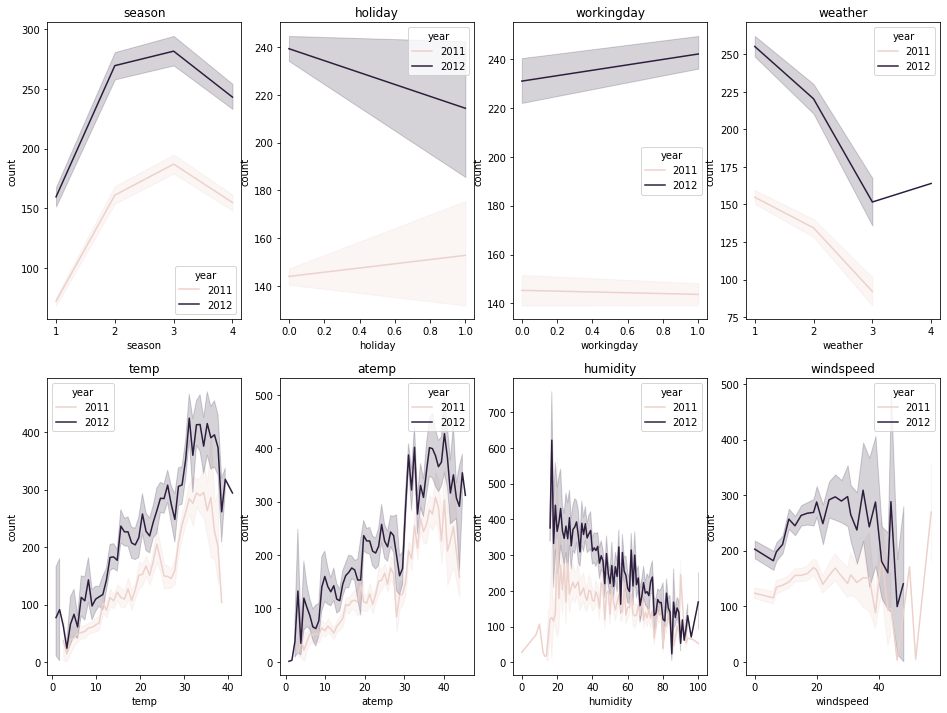

In [11]:
# 연도별 데이터 분포 확인하기
df_columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']

fig, ax = plt.subplots(2, 4, figsize = (16, 12))
count = 0

for row in range(2):
    for col in range(4):
        sns.lineplot(data = df, x = df_columns[count], y = 'count', hue = 'year', ax = ax[row][col])
        ax[row][col].set_title(df_columns[count])
        count += 1
        
plt.show()

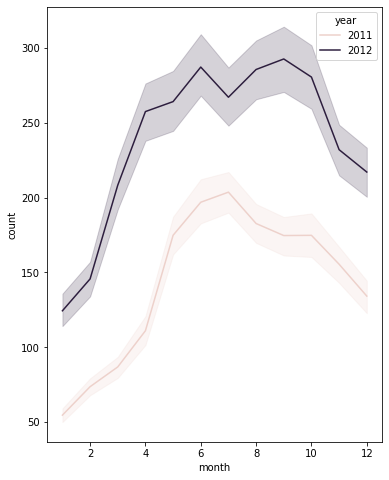

In [12]:
# 연도별 월 평균 count 수 비교하기
import numpy as np

plt.figure(figsize = (6, 8))
sns.lineplot(data = df, x = 'month', y = 'count', estimator = np.mean, hue = 'year')
plt.show()

In [13]:
cnt_2011_avg = np.mean(df[df['year'] == 2011]['count'])
cnt_2012_avg = np.mean(df[df['year'] == 2012]['count'])
print(cnt_2012_avg/cnt_2011_avg)

1.6541076427074761


- 2011년과 2012년의 자전거 대여 count 수 비교 시, 2012년이 전반적으로 2011년에 비해 1.65배 많은 것으로 나타남
    - 왜 인지는 유추가 안됨... 자전거 대여 회사에서 전반적인 수량을 늘렸을 수 있을 것 같음
    - 데이터가 있다면, 전체 제공 자전거 수 대비 대여량을 비교해도 좋을 듯 함
- holiday, workingday에서 나타나는 추세는 반대로 보이나, 이 외 계절 관련 feature는 추세가 유사하게 나타남
- year의 column은 유지하는 게 나을 듯 함

<AxesSubplot:xlabel='count', ylabel='Density'>

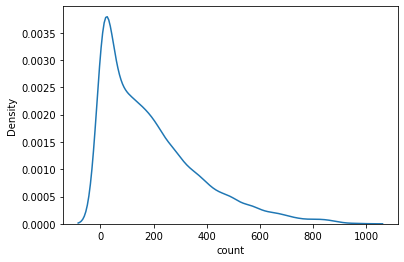

In [36]:
# count 분포 확인하기
sns.kdeplot(data = df, x = 'count')

<AxesSubplot:xlabel='count', ylabel='Count'>

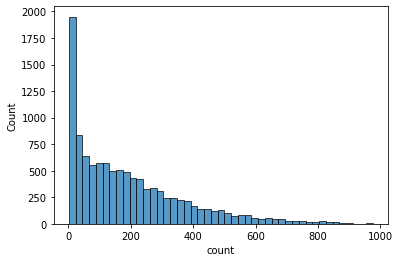

In [37]:
sns.histplot(data = df, x = 'count')

In [14]:
# X column 확인하기
X.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'hour'],
      dtype='object')

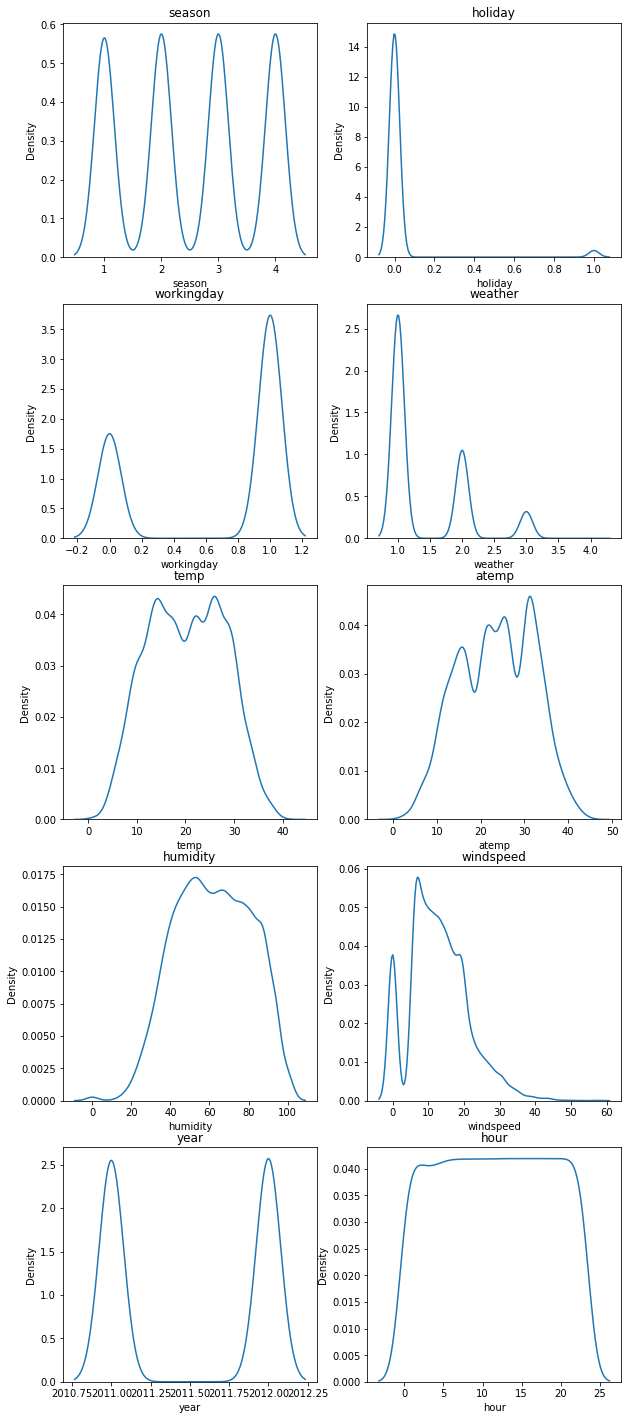

In [41]:
# 피쳐별 분포 확인하기
X_col = [col for col in X.columns]
count = 0

fig, ax = plt.subplots(5, 2, figsize = (10, 25))
for row in range(5):
    for col in range(2):
        sns.kdeplot(data = X, x = X_col[count], ax = ax[row][col])
        ax[row][col].set_title(X_col[count])
        count += 1
        
plt.show()

- wind speed 제외하고 대체적으로 고르게 분포되어 있는 것을 확인할 수 있음
- holiday, workingday, weather은 클래스별 데이터가 불균등한 것으로 확인됨

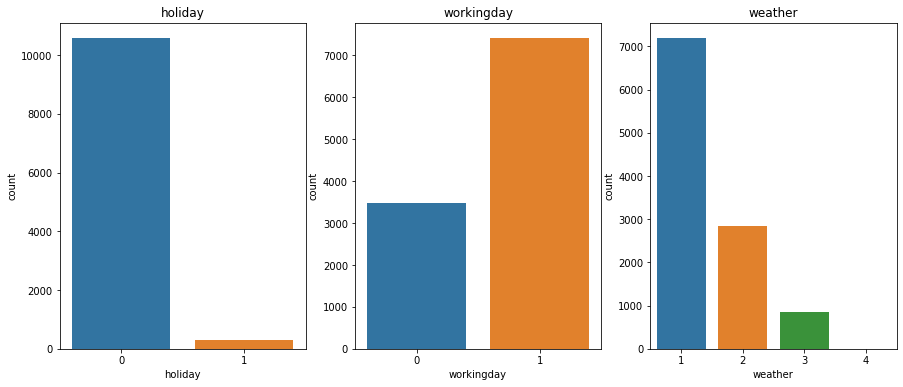

In [44]:
# holiday, workingday, weather 컬럼에 대해 countplot 그려보기
fig, ax = plt.subplots(1, 3, figsize = (15, 6))

sns.countplot(data = X, x = 'holiday', ax = ax[0]).set_title('holiday')
sns.countplot(data = X, x = 'workingday', ax = ax[1]).set_title('workingday')
sns.countplot(data = X, x = 'weather', ax = ax[2]).set_title('weather')

plt.show()

In [45]:
# holiday 컬럼 클래스별 비중 확인하기
X['holiday'].value_counts()/len(df)*100

0    97.14312
1     2.85688
Name: holiday, dtype: float64

In [46]:
# workingday 컬럼 클래스별 비중 확인하기
X['workingday'].value_counts()/len(df)*100

1    68.087452
0    31.912548
Name: workingday, dtype: float64

In [48]:
# weather 컬럼 클래스별 비중 확인하기
X['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

- holiday와 weather 컬럼의 클래스간 불균형이 특히 심하게 나타나는 것으로 보임
- weather에 'Heavy Rain'에 해당하는 '4' 값은 전체 데이터 중 1개만 확인됨 
    - count에 null값이 없는 것으로 보아, count가 유효한 값인 경우에만 데이터에 기록된 듯 함
    - Heavy Rain은 상식적으로 자전거를 타기 어려운 날씨이므로 1 > 2 > 3 > 4 순으로 데이터 비중을 차지하는 듯 함

In [50]:
# standard scaler 적용하기
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-1.34986372, -0.17149048, -1.46067232, ..., -1.56775367,
        -1.00386564, -1.66894356],
       [-1.34986372, -0.17149048, -1.46067232, ..., -1.56775367,
        -1.00386564, -1.52434128],
       [-1.34986372, -0.17149048, -1.46067232, ..., -1.56775367,
        -1.00386564, -1.379739  ],
       ...,
       [ 1.33801198, -0.17149048,  0.68461625, ...,  0.26970368,
         0.99614925,  1.36770431],
       [ 1.33801198, -0.17149048,  0.68461625, ..., -0.83244247,
         0.99614925,  1.51230659],
       [ 1.33801198, -0.17149048,  0.68461625, ..., -0.46560752,
         0.99614925,  1.65690887]])

# 3. 모델 학습 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.3, shuffle = True, random_state = 2024)
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape)

(((7620, 10), (7620,)), ((3266, 10), (3266,)))

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

In [57]:
def rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [58]:
rmse(y_val, y_pred)

138.95097432733724

In [59]:
y_pred_tr = lr.predict(X_train)
rmse(y_train, y_pred_tr)

143.0666365051056

- train rmse 값보다 validation rmse값이 더 낮은 것으로 보아 과적합이 일어난 것은 아닌 것 같음

# 4. 예측하기 

In [61]:
ls ~/data/data/bike-sharing-demand

sampleSubmission.csv  test.csv  train.csv


In [62]:
test_path = os.getenv('HOME') + ('/data/data/bike-sharing-demand/test.csv')
submission_path = os.getenv('HOME') + ('/data/data/bike-sharing-demand/sampleSubmission.csv')

test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(submission_path)

In [63]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


X.columns   
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'hour'],
      dtype='object')

In [64]:
# train 데이터와 맞추기 위해 datetime 삭제, year, hour 생성
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
test_df['year'] = test_df.datetime.dt.year
test_df['hour'] = test_df.datetime.dt.hour
test_df.drop(['datetime'], axis = 1, inplace = True)

test_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4


In [65]:
X_test_scaled = scaler.transform(test_df)
y_pred_test = lr.predict(X_test_scaled)

y_pred_test

array([-24.11878487, -25.73541666, -17.86367315, ..., 214.55812311,
       232.71660561, 222.96609761])

- 음수값이 생겼다...
- 음수값 없이 회귀모델 생성하는 방법도 있을까?

In [69]:
# x축 temp, humidity, y축 count로 예측 결과 시각화하기

test_df['pred'] = y_pred_test
test_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,pred
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,-24.118785
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,-25.735417
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,-17.863673
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,-4.849554
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3.022189


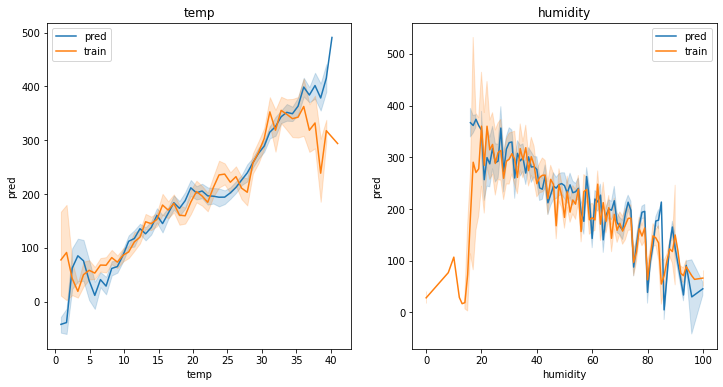

In [75]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.lineplot(data = test_df, x = 'temp', y = 'pred', ax = ax[0], label = 'pred')
sns.lineplot(data = df, x = 'temp', y = 'count', ax = ax[0], label = 'train')
ax[0].set_title('temp')

sns.lineplot(data = test_df, x = 'humidity', y = 'pred', ax = ax[1], label = 'pred')
sns.lineplot(data = df, x = 'humidity', y = 'count', ax = ax[1], label = 'train')
ax[1].set_title('humidity')

plt.show()

# 5. Kaggle 제출하기 

In [67]:
submission_df['count'] = y_pred_test
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,-24.118785
1,2011-01-20 01:00:00,-25.735417
2,2011-01-20 02:00:00,-17.863673
3,2011-01-20 03:00:00,-4.849554
4,2011-01-20 04:00:00,3.022189


In [76]:
submission_df.to_csv('./submission_df.csv', index = False)

In [79]:
ls .

EX_01_Bike-sharing-demand.ipynb  README.md
EX_01_Diabetes.ipynb             submission_df.csv
